# Betrayal of Trust: Analyzing Familial Recruitment in Minor Trafficking
### Project Overview
This analysis investigates the Global Synthetic Dataset with a specific focus on **minor victims**. The goal is to determine how recruitment by a family member impacts the severity of abuse and the sectors into which children are trafficked.

**Key Technical Skills Demonstrated:**
* **Data Reshaping:** Using `pd.melt` and `pd.Categorical` for high-dimensional analysis.
* **Iterative Plotting:** Generating comparative subplot grids for gender-based insights.
* **Trend Analysis:** Mapping the evolution of trafficking tactics over time.

Data Source: [CTDC Global Synthetic Dataset](https://www.ctdatacollaborative.org/dataset/global-synthetic-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [2]:
data = pd.read_csv('CTDC_global_synthetic_data_v2025.csv')

data['yearOfRegistration'] = pd.to_datetime(data['yearOfRegistration'], format='%Y')

data

,yearOfRegistration,gender,ageBroad,citizenship,CountryOfExploitation,traffickMonths,meansDebtBondageEarnings,meansThreats,meansAbusePsyPhySex,meansFalsePromises,...,typeOfLabourAgriculture,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfSexProstitution,typeOfSexPornography,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther
0,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257964,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257965,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257966,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257967,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
binary_columns = [
    'meansDebtBondageEarnings',
    'meansThreats',
    'meansAbusePsyPhySex',
    'meansFalsePromises',
    'meansDrugsAlcohol',
    'meansDenyBasicNeeds',
    'meansExcessiveWorkHours',
    'meansWithholdDocs',
    'isForcedLabour',
    'isSexualExploit',
    'isOtherExploit',
    'typeOfLabourAgriculture',
    'typeOfLabourConstruction',
    'typeOfLabourDomesticWork',
    'typeOfLabourHospitality',
    'typeOfSexProstitution',
    'typeOfSexPornography',
    'recruiterRelationIntimatePartner',
    'recruiterRelationFriend',
    'recruiterRelationFamily',
    'recruiterRelationOther'
]

In [4]:
means_of_control = [
    'meansDebtBondageEarnings',
    'meansThreats',
    'meansAbusePsyPhySex',
    'meansFalsePromises',
    'meansDrugsAlcohol',
    'meansDenyBasicNeeds',
    'meansExcessiveWorkHours',
    'meansWithholdDocs'
]

In [5]:
type_of_trafficking = [
    'isForcedLabour',
    'isSexualExploit',
    'isOtherExploit'
]

In [6]:
sector = [
    'typeOfLabourAgriculture',
    'typeOfLabourConstruction',
    'typeOfLabourDomesticWork',
    'typeOfLabourHospitality',
    'typeOfSexProstitution',
    'typeOfSexPornography'
]

In [7]:
recruiter = [
    'recruiterRelationIntimatePartner',
    'recruiterRelationFriend',
    'recruiterRelationFamily',
    'recruiterRelationOther'
]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257969 entries, 0 to 257968
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   yearOfRegistration                222751 non-null  datetime64[ns]
 1   gender                            205148 non-null  object        
 2   ageBroad                          137139 non-null  object        
 3   citizenship                       126643 non-null  object        
 4   CountryOfExploitation             202006 non-null  object        
 5   traffickMonths                    23512 non-null   object        
 6   meansDebtBondageEarnings          38725 non-null   float64       
 7   meansThreats                      46655 non-null   float64       
 8   meansAbusePsyPhySex               57647 non-null   float64       
 9   meansFalsePromises                27375 non-null   float64       
 10  meansDrugsAlcohol               

In [9]:
data['ageBroad'].unique()

array(['30--38', '39--47', '21--23', '24--26', '27--29', '48+', nan,
       '18--20', '09--17', '0--8'], dtype=object)

In [10]:
age = data.dropna(subset='ageBroad').copy()

def minor_adult(age):
    if age in ['0--8', '09--17']:
        return 'minor'
    else:
        return 'adult'

age['minor_or_adult'] = age['ageBroad'].apply(minor_adult)

age

,yearOfRegistration,gender,ageBroad,citizenship,CountryOfExploitation,traffickMonths,meansDebtBondageEarnings,meansThreats,meansAbusePsyPhySex,meansFalsePromises,...,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfSexProstitution,typeOfSexPornography,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,minor_or_adult
0,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,adult
1,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,adult
2,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,adult
3,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,adult
4,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241493,2023-01-01,NaN,09--17,NaN,MDA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,minor
241494,2023-01-01,NaN,09--17,NaN,MDA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,minor
241495,2023-01-01,NaN,24--26,BDI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adult
241496,2023-01-01,NaN,24--26,PHL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adult


In [11]:
age[binary_columns] = age[binary_columns].fillna(0)

age

,yearOfRegistration,gender,ageBroad,citizenship,CountryOfExploitation,traffickMonths,meansDebtBondageEarnings,meansThreats,meansAbusePsyPhySex,meansFalsePromises,...,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfSexProstitution,typeOfSexPornography,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,minor_or_adult
0,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,adult
1,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,adult
2,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,adult
3,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,adult
4,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241493,2023-01-01,NaN,09--17,NaN,MDA,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
241494,2023-01-01,NaN,09--17,NaN,MDA,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
241495,2023-01-01,NaN,24--26,BDI,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,adult
241496,2023-01-01,NaN,24--26,PHL,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,adult


In [12]:
age.groupby('minor_or_adult')[sector].mean() * 100

,typeOfLabourAgriculture,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfSexProstitution,typeOfSexPornography
minor_or_adult,,,,,,
adult,2.185101,2.842439,4.504333,1.029290,11.142398,1.078757
minor,0.721469,0.459117,2.117559,0.758948,22.693485,5.796739


In [13]:
age

,yearOfRegistration,gender,ageBroad,citizenship,CountryOfExploitation,traffickMonths,meansDebtBondageEarnings,meansThreats,meansAbusePsyPhySex,meansFalsePromises,...,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfSexProstitution,typeOfSexPornography,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,minor_or_adult
0,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,adult
1,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,adult
2,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,adult
3,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,adult
4,2015-01-01,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241493,2023-01-01,NaN,09--17,NaN,MDA,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
241494,2023-01-01,NaN,09--17,NaN,MDA,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
241495,2023-01-01,NaN,24--26,BDI,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,adult
241496,2023-01-01,NaN,24--26,PHL,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,adult


In [14]:
age[(age['minor_or_adult'] == 'minor') & (age['typeOfSexPornography'])][recruiter].mean() * 100

# 76.19% of the minors interviewed listed NaN as who their recruiter was

recruiterRelationIntimatePartner     6.573276
recruiterRelationFriend              1.885776
recruiterRelationFamily             14.008621
recruiterRelationOther               1.346983
dtype: float64

In [15]:
age[(age['minor_or_adult'] == 'minor') & (age['typeOfSexProstitution'])][recruiter].mean() * 100

# 73.27%  of minors interviewed listed NaN as their recruiter

recruiterRelationIntimatePartner     3.922378
recruiterRelationFriend              2.972750
recruiterRelationFamily             13.982934
recruiterRelationOther               5.849160
dtype: float64

In [16]:
age[(age['minor_or_adult'] == 'adult') & (age['typeOfSexProstitution'])][recruiter].mean() * 100

# 71.88% of minors interviewed listed NaN as their recruiter

recruiterRelationIntimatePartner    10.535303
recruiterRelationFriend              3.099121
recruiterRelationFamily              4.319986
recruiterRelationOther              10.168189
dtype: float64

In [17]:
age.loc[(age['minor_or_adult'] == 'minor')].groupby('recruiterRelationFriend')[means_of_control].mean() * 100

# "While familial recruitment is a betrayal of trust, 
# the data reveals it is also significantly more violent. 
# Minors recruited by family members saw a 61.4% confirmed rate of abuse, 
# compared to just 16.3% for those recruited by non-family members. 
# This suggests that traffickers within the family unit rely heavily 
# on physical and psychological violence rather than the 'administrative' 
# control (like document withholding) often seen in labor trafficking."

,meansDebtBondageEarnings,meansThreats,meansAbusePsyPhySex,meansFalsePromises,meansDrugsAlcohol,meansDenyBasicNeeds,meansExcessiveWorkHours,meansWithholdDocs
recruiterRelationFriend,,,,,,,,
0.0,5.919898,11.153662,21.349928,3.970002,5.926281,11.003670,2.996649,1.190362
1.0,9.956076,18.740849,29.868228,3.513909,12.591508,15.373353,1.171303,0.585652


## 1. The Violence Gap: Family vs. Non-Family Recruiters
Is recruitment by a family member "safer" or more administrative? This chart compares the means of control used by family members against all other recruiter types.

> **Insight:** The data reveals a stark contrast—family members are significantly more likely to utilize physical and psychological abuse as a primary mean of control.

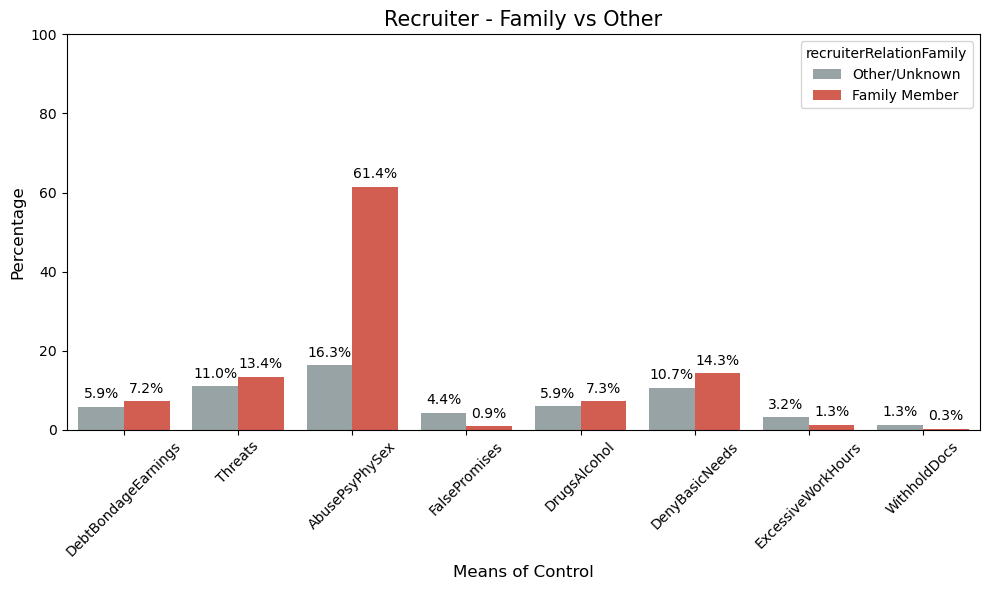

In [18]:
minor_df = age[age['minor_or_adult'] == 'minor']

minor_df_plot = minor_df.groupby('recruiterRelationFamily')[means_of_control].mean() * 100

minor_df_plot = minor_df_plot.reset_index()

minor_df_plot = pd.melt(minor_df_plot, id_vars='recruiterRelationFamily')

minor_df_plot['recruiterRelationFamily'] = minor_df_plot['recruiterRelationFamily'].map({
                                                    0.0: 'Other/Unknown',
                                                    1.0: 'Family Member'
                                               })
minor_df_plot['variable'] = minor_df_plot['variable'].str.replace('means', '')

plt.figure(figsize=(10,6))
ax = (sns.barplot(data=minor_df_plot, 
                  x='variable', 
                  y='value', 
                  hue='recruiterRelationFamily', 
                  palette=['#95a5a6', '#e74c3c']))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
               (p.get_x() + p.get_width() / 2, p.get_height()),
               ha='center', va='center',
               xytext=(0,9),
               textcoords='offset points')
plt.title('Recruiter - Family vs Other', fontsize=15)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Means of Control', fontsize=12)

plt.ylim(0,100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

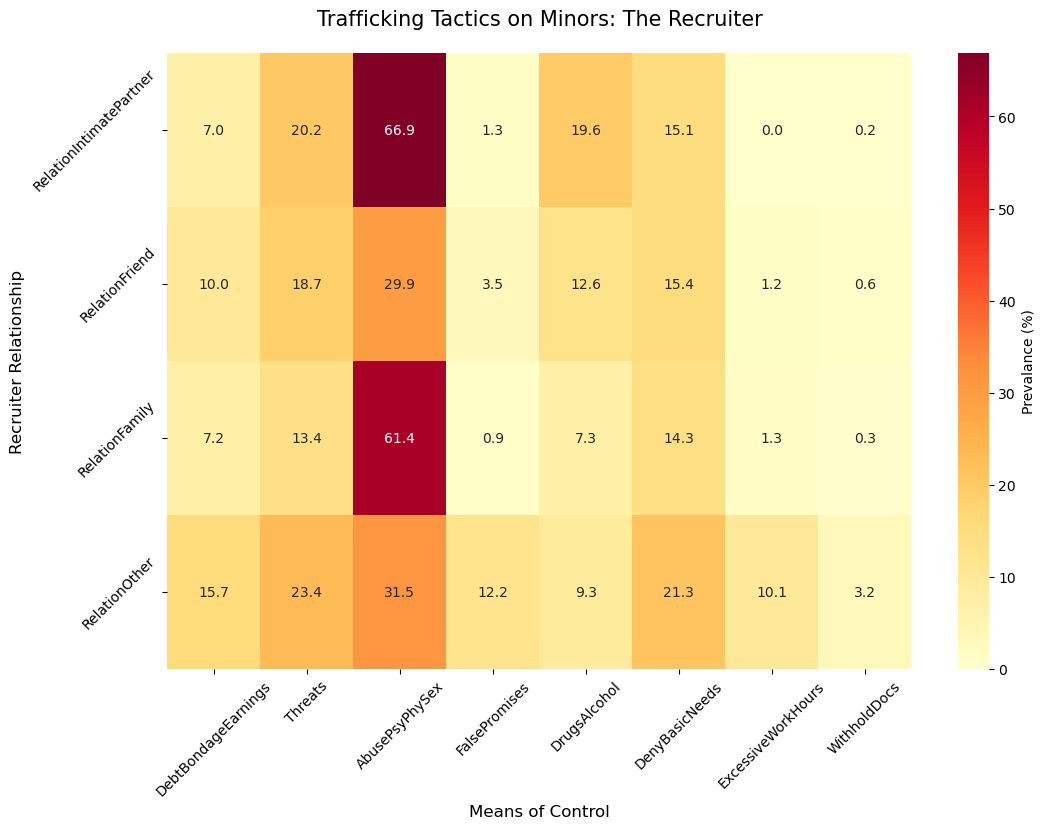

In [19]:
heat_map_data = pd.DataFrame()

for r in recruiter:
    subset = minor_df[minor_df[r] == 1]
    
#     print(f'found {len(subset)} victoms for: {r}')
    
    heat_map_data[r] = subset[means_of_control].mean() * 100

heat_map_data.columns = [c.replace('recruiter', '') for c in heat_map_data.columns]
heat_map_data.index = [i.replace('means', '') for i in heat_map_data.index]

plt.figure(figsize=(12,8))
sns.heatmap(data=heat_map_data.T,
           annot=True,
           cmap='YlOrRd',
           fmt='.1f',
           cbar_kws={'label': 'Prevalance (%)'})

plt.title('Trafficking Tactics on Minors: The Recruiter', fontsize=15, pad=20)
plt.xlabel('Means of Control', fontsize=12)
plt.ylabel('Recruiter Relationship', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [20]:
minor_df['gender'].isna().sum()

4550

## 2. Gendered Trafficking Sectors
Trafficking is not a monolith. Here, we analyze which labor and sex sectors minors are pushed into, segmented by gender (Boy, Girl, and Transgender), to see if family members target different sectors based on the victim's gender.

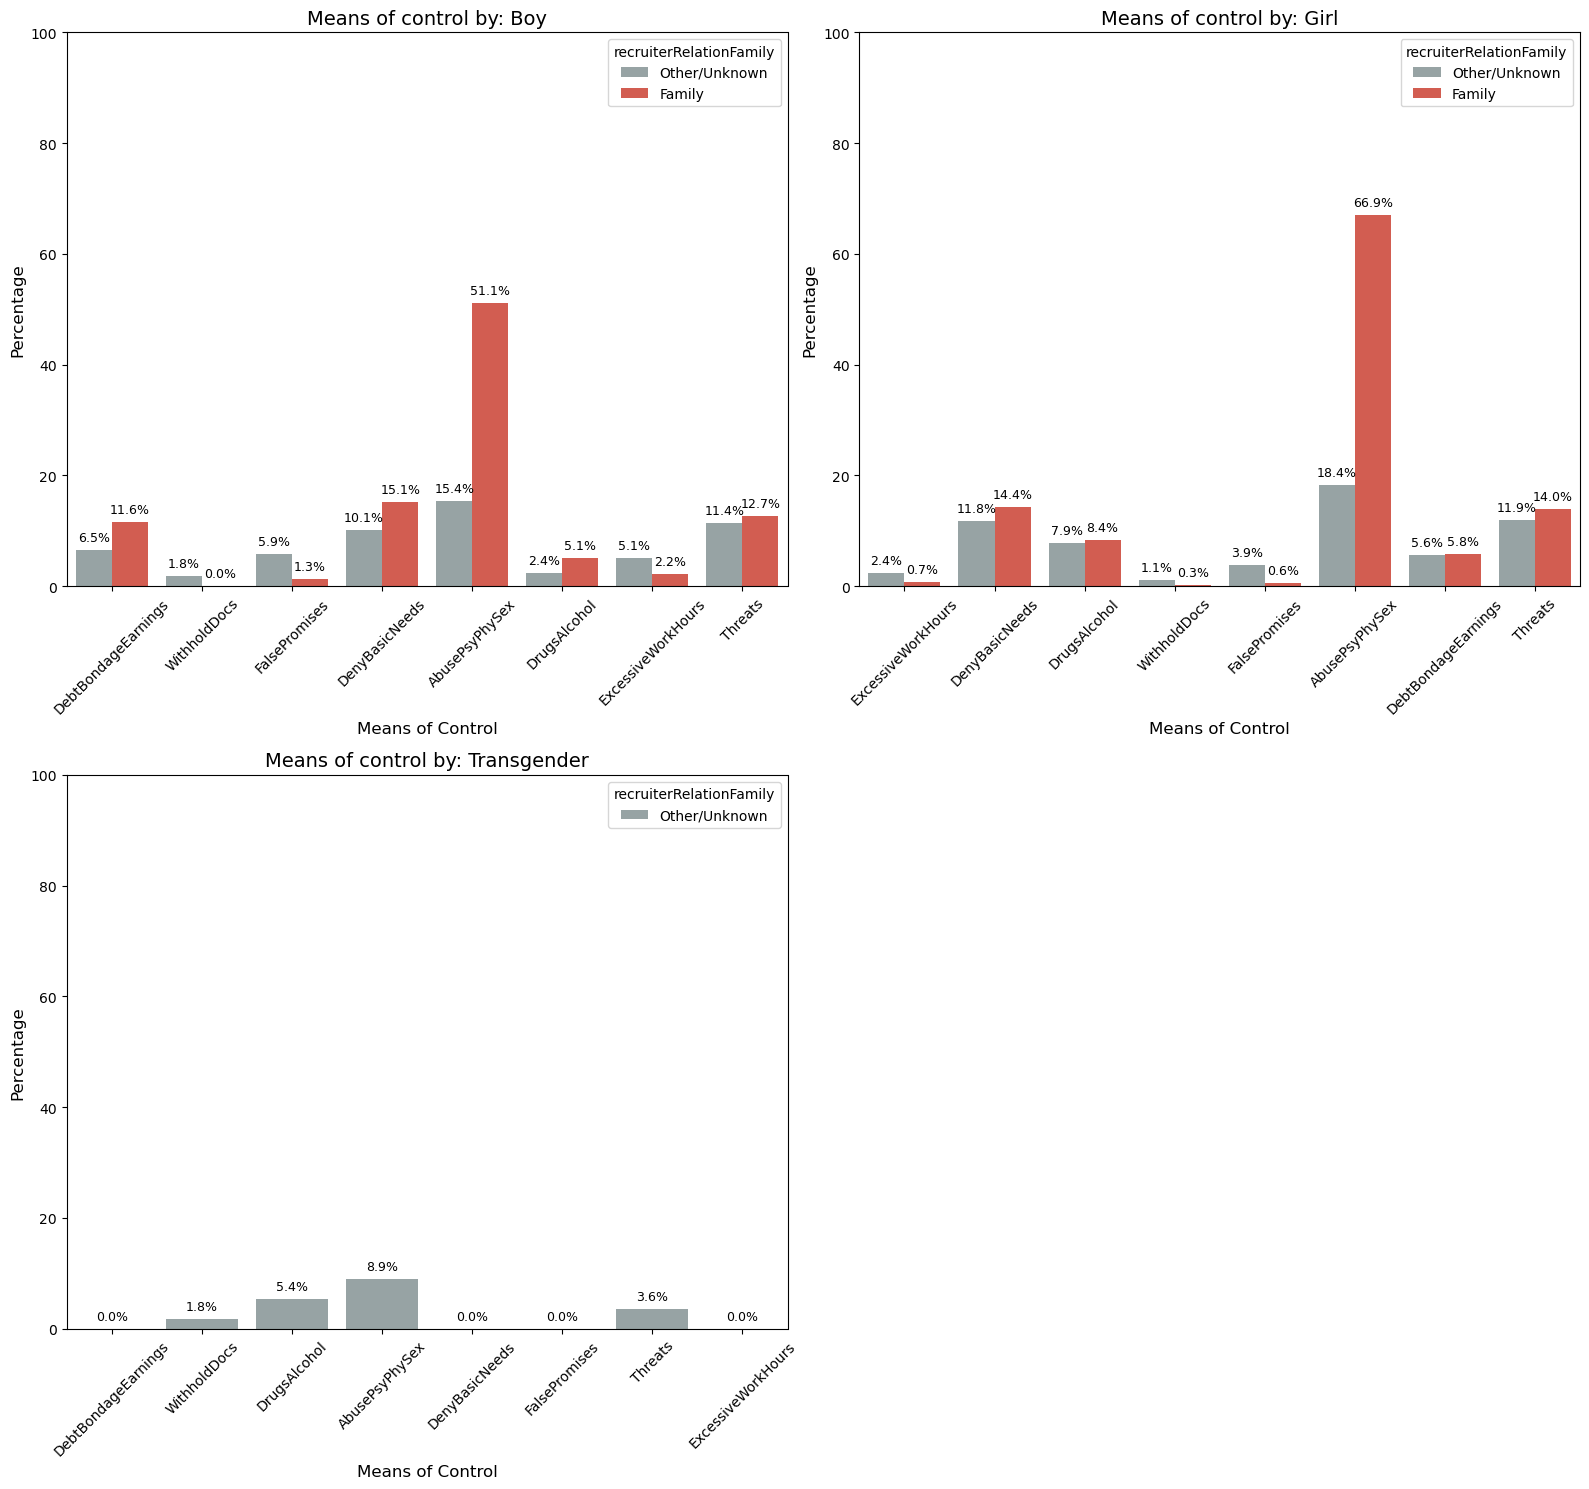

In [21]:
minor_df_sex = minor_df.dropna(subset=['gender'])

minor_df_sex_plot = minor_df_sex.groupby(['recruiterRelationFamily', 'gender'])[means_of_control].mean() * 100

minor_df_sex_plot = minor_df_sex_plot.reset_index()


minor_df_sex_plot['recruiterRelationFamily'] = minor_df_sex_plot['recruiterRelationFamily'].map({
                                                    0.0: 'Other/Unknown',
                                                    1.0: 'Family'
                                                })
minor_df_sex_plot.replace({'Trans/Transgender/NonConforming': 'Transgender', 'Man': 'Boy', 'Woman': 'Girl'}, inplace=True)

minor_df_sex_plot = pd.melt(minor_df_sex_plot, id_vars=['recruiterRelationFamily', 'gender'])

gender_order = ([
    'Boy',
    'Girl',
    'Transgender'
])

means_order =([
    'meansDebtBondageEarnings',
    'meansThreats',
    'meansAbusePsyPhySex',
    'meansFalsePromises',
    'meansDrugsAlcohol',
    'meansDenyBasicNeeds',
    'meansExcessiveWorkHours',
    'meansWithholdDocs'
])

minor_df_sex_plot['gender'] = pd.Categorical(minor_df_sex_plot['gender'], categories=gender_order, ordered=True)

minor_df_sex_plot['variable'] = pd.Categorical(minor_df_sex_plot['variable'], categories=means_order, ordered=True)

minor_df_sex_plot['variable'] = minor_df_sex_plot['variable'].str.replace('means', '')

minor_df_sex_plot = minor_df_sex_plot.sort_values('gender')

genders = minor_df_sex_plot['gender'].unique()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16,15))
axes = axes.flatten()

for i, gender in enumerate(genders):
    subset = minor_df_sex_plot[minor_df_sex_plot['gender'] == gender]
    
    ax_plot = (sns.barplot(data=subset,
                          x='variable',
                          y='value',
                          hue='recruiterRelationFamily',
                           ax=axes[i],
                          palette=['#95a5a6', '#e74c3c']))
    axes[i].set_title(f"Means of control by: {gender}", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0,100)
    axes[i].set_ylabel('Percentage', fontsize=12)
    axes[i].set_xlabel('Means of Control', fontsize=12)
    
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.1f}%',
           (p.get_x() + p.get_width() / 2, p.get_height()),
           ha='center', va='center',
           xytext=(0,9),
           textcoords='offset points',
           fontsize=9)
        
    axes[3].set_axis_off()

plt.tight_layout()
plt.show()

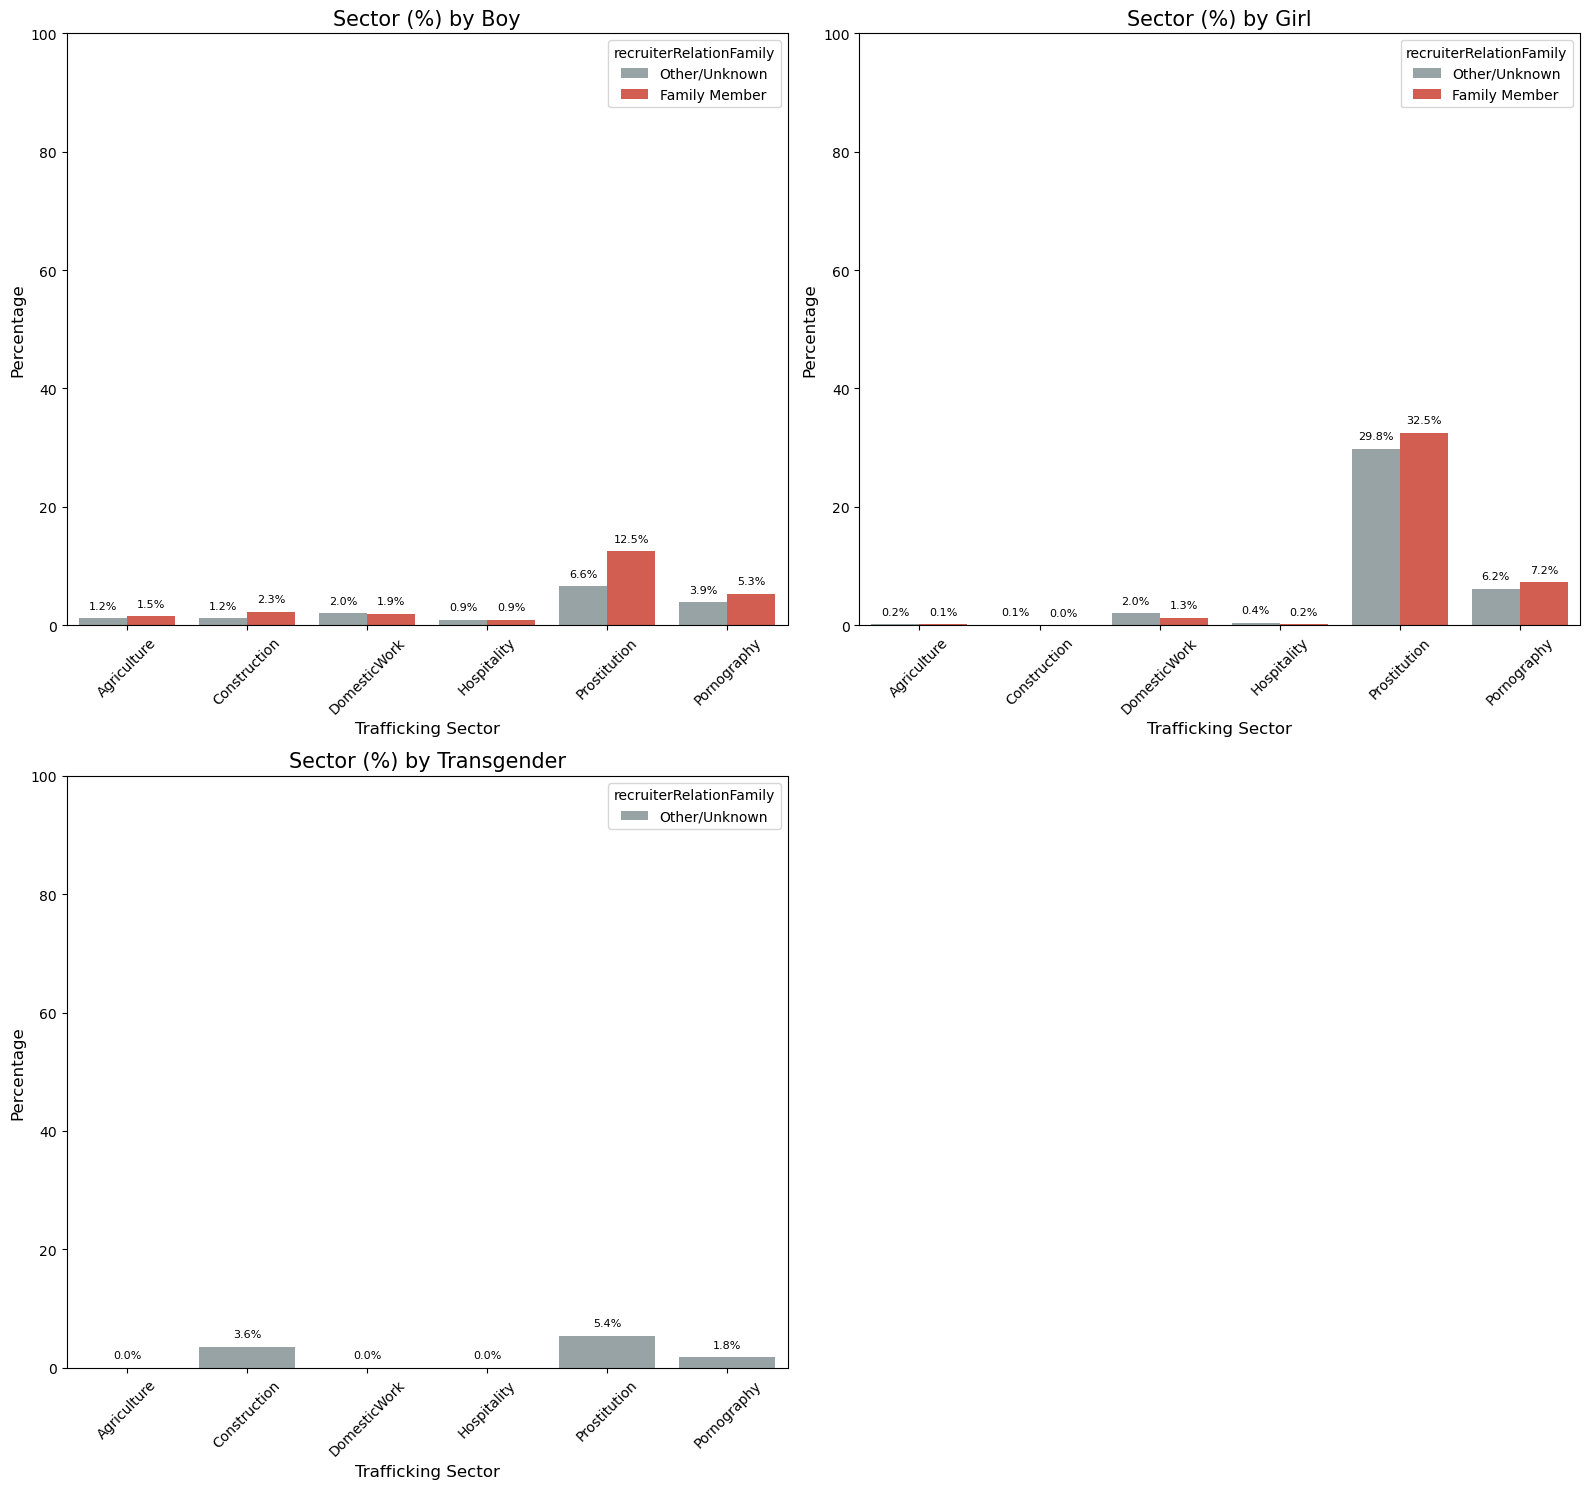

In [22]:
minor_sector_df = age[(age['minor_or_adult'] == 'minor') & (age['gender'].notna())].groupby(['recruiterRelationFamily', 'gender'])[sector].mean() * 100

minor_sector_df = minor_sector_df.reset_index()

minor_sector_df['recruiterRelationFamily'] = minor_sector_df['recruiterRelationFamily'].map({
                                                        0: 'Other/Unknown',                                                      1: 'Family Member'
})

minor_sector_df = pd.melt(minor_sector_df, id_vars=['gender', 'recruiterRelationFamily'])

sector_order = ([
    'typeOfLabourAgriculture',
    'typeOfLabourConstruction',
    'typeOfLabourDomesticWork',
    'typeOfLabourHospitality',
    'typeOfSexProstitution',
    'typeOfSexPornography'
])

minor_sector_df['variable'] = pd.Categorical(minor_sector_df['variable'], categories=sector_order, ordered=True)

minor_sector_df.replace({'Man': 'Boy', 'Woman': 'Girl', 'Trans/Transgender/NonConforming': 'Transgender'}, inplace=True)

minor_sector_df['gender'] = pd.Categorical(minor_sector_df['gender'], categories=gender_order, ordered=True)

minor_sector_df = minor_sector_df.sort_values(['gender', 'variable'])

genders = minor_sector_df['gender'].unique()

minor_sector_df['variable'] = minor_sector_df['variable'].str.replace('typeOfLabour', '').str.replace('typeOfSex', '')

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16,15))
axes = axes.flatten()

for i, gender in enumerate(genders):
    subset = minor_sector_df[minor_sector_df['gender'] == gender]
        
    ax_plot = (sns.barplot(data=subset,
              x='variable',
              y='value',
              ax=axes[i],
              hue='recruiterRelationFamily',
              palette=['#95a5a6', '#e74c3c']))
    
    axes[i].set_title(f'Sector (%) by {gender}', fontsize=15)
    axes[i].set_ylim(0,100)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Percentage', fontsize=12)
    axes[i].set_xlabel('Trafficking Sector', fontsize=12)
    
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.1f}%',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='center',
            xytext=(0,9),
            textcoords=('offset points'),
            fontsize=8
            )
    axes[3].set_axis_off()
    
plt.tight_layout()
plt.show()

In [23]:
minor_df

,yearOfRegistration,gender,ageBroad,citizenship,CountryOfExploitation,traffickMonths,meansDebtBondageEarnings,meansThreats,meansAbusePsyPhySex,meansFalsePromises,...,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfSexProstitution,typeOfSexPornography,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,minor_or_adult
3791,2016-01-01,Woman,09--17,USA,USA,NaN,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,minor
4514,2019-01-01,Woman,09--17,MMR,BGD,NaN,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
4515,2019-01-01,Woman,09--17,MMR,BGD,NaN,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
5515,NaT,Man,0--8,NGA,LBY,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
5516,NaT,Man,09--17,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239538,2021-01-01,NaN,09--17,NaN,TUN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
240600,2022-01-01,NaN,09--17,CMR,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
240601,2022-01-01,NaN,09--17,IDN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
241493,2023-01-01,NaN,09--17,NaN,MDA,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor


In [24]:
minor_df

,yearOfRegistration,gender,ageBroad,citizenship,CountryOfExploitation,traffickMonths,meansDebtBondageEarnings,meansThreats,meansAbusePsyPhySex,meansFalsePromises,...,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfSexProstitution,typeOfSexPornography,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,minor_or_adult
3791,2016-01-01,Woman,09--17,USA,USA,NaN,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,minor
4514,2019-01-01,Woman,09--17,MMR,BGD,NaN,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
4515,2019-01-01,Woman,09--17,MMR,BGD,NaN,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
5515,NaT,Man,0--8,NGA,LBY,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
5516,NaT,Man,09--17,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239538,2021-01-01,NaN,09--17,NaN,TUN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
240600,2022-01-01,NaN,09--17,CMR,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
240601,2022-01-01,NaN,09--17,IDN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
241493,2023-01-01,NaN,09--17,NaN,MDA,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor


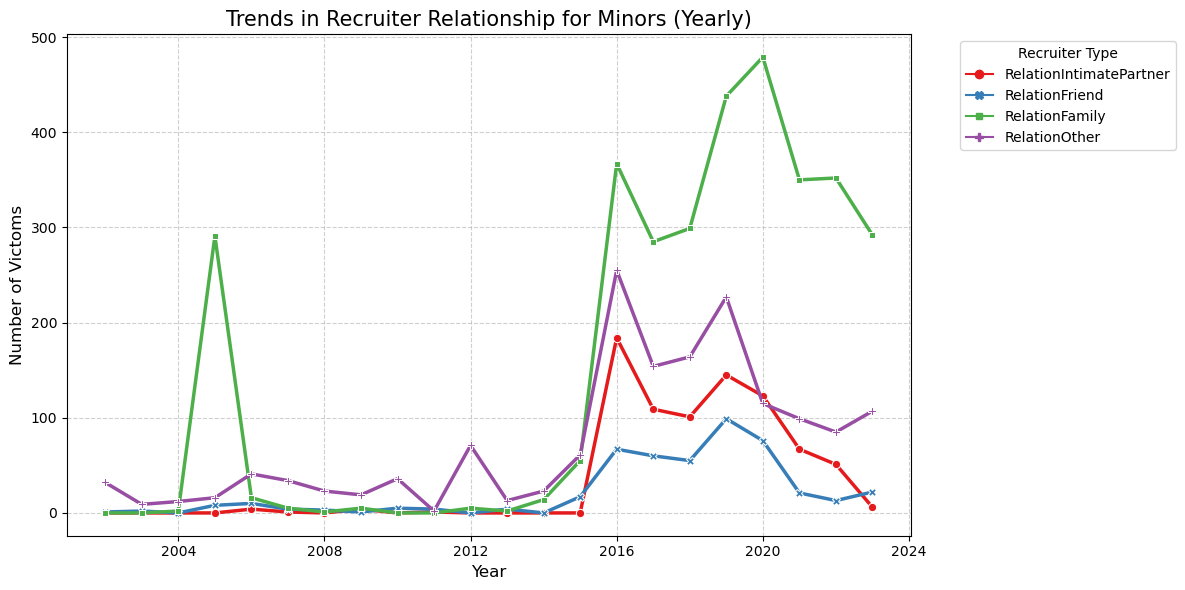

In [25]:
yearly_trend_recruiter = minor_df.groupby('yearOfRegistration')[recruiter].sum()

yearly_trend_recruiter.columns = [c.replace('recruiter', '') for c in yearly_trend_recruiter.columns]

plt.figure(figsize=(12,6))

sns.lineplot(data=yearly_trend_recruiter,
            markers=True,
            dashes=False,
            palette='Set1',
            linewidth=2.5)
plt.title('Trends in Recruiter Relationship for Minors (Yearly)', fontsize=15)
plt.ylabel('Number of Victoms', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Recruiter Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

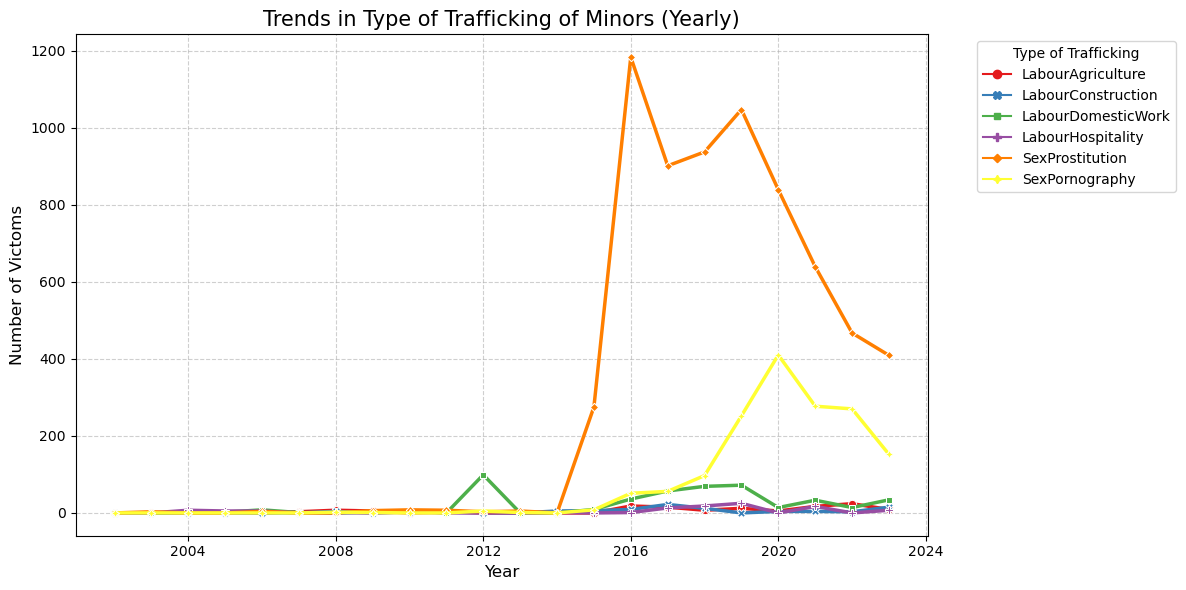

In [26]:
yearly_trend_sector = minor_df.groupby('yearOfRegistration')[sector].sum()

yearly_trend_sector.columns = [c.replace('typeOf', '') for c in yearly_trend_sector]

plt.figure(figsize=(12,6))

sns.lineplot(
    data=yearly_trend_sector,
    markers=True,
    dashes=False,
    palette='Set1',
    linewidth=2.5
)

plt.title('Trends in Type of Trafficking of Minors (Yearly)', fontsize=15)
plt.ylabel('Number of Victoms', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Type of Trafficking', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

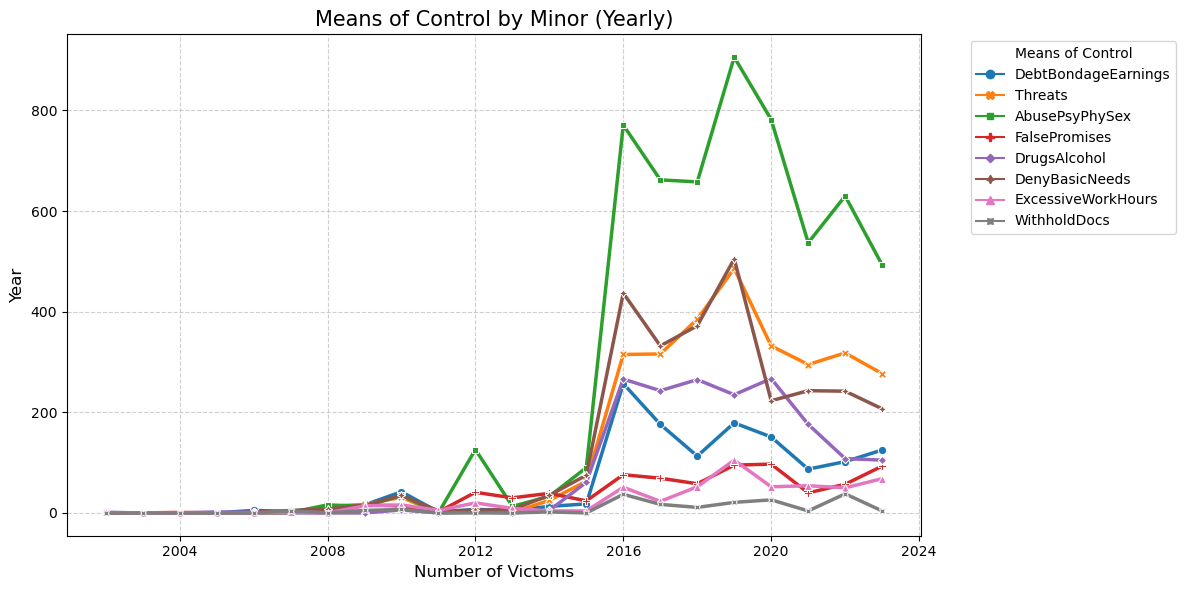

In [27]:
yearly_trend_means = minor_df.groupby('yearOfRegistration')[means_of_control].sum()

yearly_trend_means.columns = [c.replace('means', '') for c in yearly_trend_means.columns]

plt.figure(figsize=(12,6))

sns.lineplot(
    data=yearly_trend_means,
    palette='tab10',
    dashes=False,
    markers=True,
    linewidth=2.5
)

plt.title('Means of Control by Minor (Yearly)', fontsize=15)
plt.legend(title='Means of Control', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Number of Victoms', fontsize=12)
plt.ylabel('Year', fontsize=12)

plt.tight_layout()
plt.show()